# **Assignment 3: A Baby Project**
### **-Shiyamalan Selvakumar**

## ***IMPORTING FILES***

In [3]:
##Importing all the necessary functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from datetime import datetime

In [ ]:
csds = pd.read_csv("../Data/corporate_stress_dataset.csv") ##Importing the Dataset into Jupyter Notebook

## ***ABOUT DATASET***

### **Dataset Description**

- This Corporate Stress Dataset contains information about employee stress levels in different departments of a company. It includes data on stress levels, department names, dates, and possibly other factors that may affect workplace stress. The dataset can help identify which departments have the most stress, how stress changes over time, and possible reasons behind high stress levels.

### 1. Dataset Display

In [9]:
csds.head() ##Displays Dataset

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


### 2. Dataset Information

In [11]:
csds.info() ##Shows information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

### 3. Dataset Stats

In [13]:
csds.describe(include = "all").round(2) ##Shows the Stats about the Dataset

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
count,50000.00,50000.00,50000,50000,50000,50000.00,50000.00,50000.00,50000.00,50000,...,50000.00,50000.00,50000.00,50000.00,50000.00,50000,50000,50000,50000,50000
unique,NaN,NaN,3,4,6,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,2,2,2,3,4
top,NaN,NaN,Female,Single,Manager,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,False,True,False,Occasional,Tier-2
freq,NaN,NaN,16769,12569,8465,NaN,NaN,NaN,NaN,25234,...,NaN,NaN,NaN,NaN,NaN,25091,25155,25139,16677,12524
mean,25000.50,41.52,NaN,NaN,NaN,20.07,110129.93,62.54,1.50,NaN,...,5.00,4.99,4.98,5.01,50.50,NaN,NaN,NaN,NaN,NaN
std,14433.90,13.83,NaN,NaN,NaN,11.84,52069.68,16.17,0.87,NaN,...,3.17,3.16,3.16,3.18,28.89,NaN,NaN,NaN,NaN,NaN
min,1.00,18.00,NaN,NaN,NaN,0.00,20001.96,35.00,0.00,NaN,...,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN
25%,12500.75,30.00,NaN,NaN,NaN,10.00,64875.49,49.00,0.74,NaN,...,2.00,2.00,2.00,2.00,25.00,NaN,NaN,NaN,NaN,NaN
50%,25000.50,41.00,NaN,NaN,NaN,20.00,110168.20,62.00,1.50,NaN,...,5.00,5.00,5.00,5.00,51.00,NaN,NaN,NaN,NaN,NaN
75%,37500.25,54.00,NaN,NaN,NaN,30.00,155322.66,77.00,2.25,NaN,...,8.00,8.00,8.00,8.00,75.00,NaN,NaN,NaN,NaN,NaN


### 4. Dataset NA counts

In [15]:
csds.isna().sum() ##Sums all the NA in each column

ID                                      0
Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                0
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      0
Remote_Work                             0
Stress_Level                            0
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               0
Manager_Support_Level                   0
Work_Pressure_Level                     0
Annual_Leaves_Taken                     0
Work_Life_Balance                       0
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                

### 5. Dataset Duplicates Counts

In [17]:
csds.duplicated().sum() ##Sums all dubplicated value

0

## ***SUMMARIES***

### 1. Average Job Satisfaction by Job Role

In [20]:
csds.groupby("Job_Role")["Job_Satisfaction"].mean().round(2)

Job_Role
Analyst      4.93
Developer    4.98
HR           5.03
Manager      5.02
Sales        4.98
Support      4.97
Name: Job_Satisfaction, dtype: float64

### 2. Average Weekly Work Hours Per Job Role

In [22]:
csds.groupby("Job_Role")["Working_Hours_per_Week"].mean().round(2)

Job_Role
Analyst      62.55
Developer    62.65
HR           62.64
Manager      62.54
Sales        62.43
Support      62.42
Name: Working_Hours_per_Week, dtype: float64

### 3. Burnout Symptoms Distribution by Job Role

In [24]:
csds.groupby("Job_Role")["Burnout_Symptoms"].value_counts().unstack()

Burnout_Symptoms,No,Occasional,Yes
Job_Role,,,
Analyst,2843,2777,2715
Developer,2741,2788,2839
HR,2749,2832,2693
Manager,2805,2777,2883
Sales,2801,2779,2796
Support,2723,2724,2735


## ***VISUALS***

### 1. Overall Burnout Symptoms Distribution

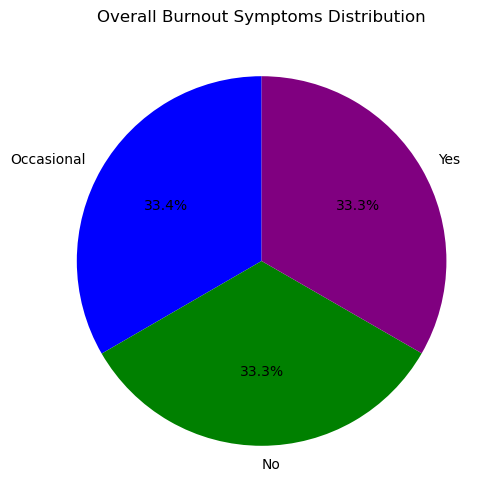

In [27]:
# Create pie chart
plt.figure(figsize=(8,6))
csds["Burnout_Symptoms"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["blue", "green", "purple"])
plt.title("Overall Burnout Symptoms Distribution") # Titles
plt.ylabel("")  # Hide y-label for better visibility
plt.show() # Show plot

### 2. Work-Life Balance Scores by Department

C:\Users\shami\AppData\Local\Temp\ipykernel_31980\3060307089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csds, x="Department", y="Work_Life_Balance", palette="coolwarm")


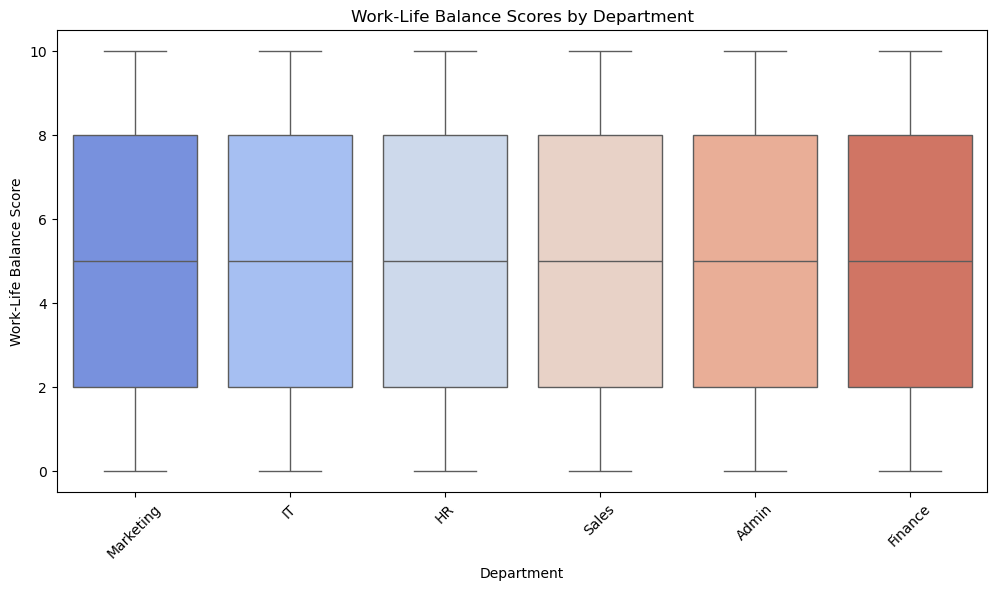

In [29]:
plt.figure(figsize=(12,6)) # Create a boxplot
sns.boxplot(data=csds, x="Department", y="Work_Life_Balance", palette="coolwarm")
plt.title("Work-Life Balance Scores by Department")# Titles and labels
plt.xlabel("Department")
plt.ylabel("Work-Life Balance Score")
plt.xticks(rotation=45)
plt.show()# Show plot

### 3. Average Monthly Salary by Job Role

C:\Users\shami\AppData\Local\Temp\ipykernel_31980\3652925640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.index, y=avg_salary.values, palette="coolwarm", width=0.6) # Create bar chart


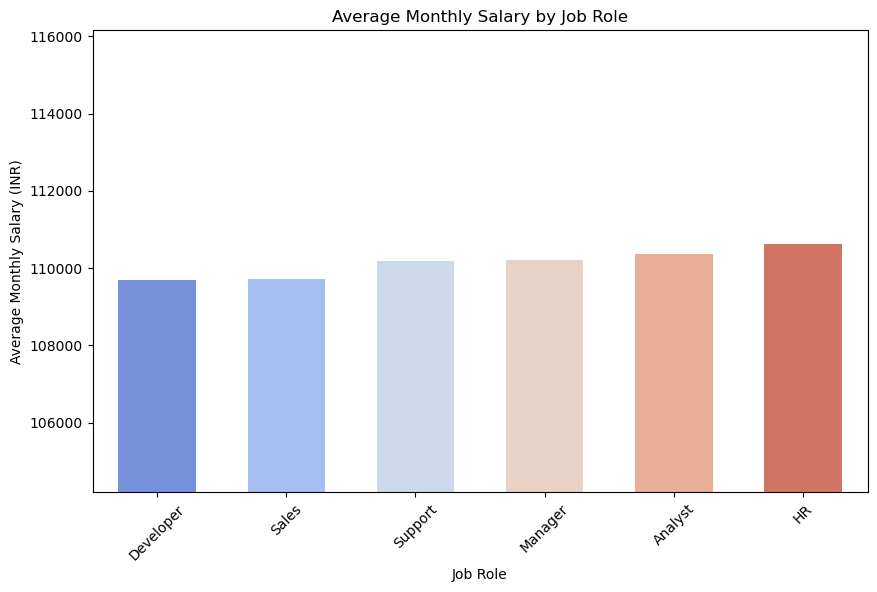

In [31]:
plt.figure(figsize=(10,6))
avg_salary = csds.groupby("Job_Role")["Monthly_Salary_INR"].mean().sort_values()
sns.barplot(x=avg_salary.index, y=avg_salary.values, palette="coolwarm", width=0.6) # Create bar chart
plt.title("Average Monthly Salary by Job Role") # Titles and labels
plt.xlabel("Job Role")
plt.ylabel("Average Monthly Salary (INR)")
plt.xticks(rotation=45)  # Rotate job role names for better readability
plt.ylim(min(avg_salary.values) * 0.95, max(avg_salary.values) * 1.05)
plt.show() # Show plot

## ***Understanding the Dataset***

## Key Findings

- HR and Manager roles have the highest job satisfaction, while other roles show slightly lower scores.
- Employees work around 62 hours per week on average, which is quite high.
- Sales and Support roles report the highest burnout cases, while Managers and HR roles have fewer cases.

## Insights from Visuals

- Evenly distributed burnout symptoms, with about 33% of employees experiencing burnout.
- Some departments offer significantly better balance than others.
- Some roles earn much more than others, which may impact job satisfaction.

## Conclusion

1. Burnout is a major issue in certain job roles.
2. Work-life balance is inconsistent across departments.
3. Salary gaps could be contributing to workplace stress.
4. Reducing excessive work hours and improving managerial support may help lower stress levels.